In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd '/content/drive/MyDrive/CHDataScience/Entrega 4'
df = pd.read_csv('glassdoor_reviews.csv')

Mounted at /content/drive
/content/drive/MyDrive/CHDataScience/Entrega 4


#**Abstracto:**

>Glassdoor se ha convertido en la única plataforma que permite ver a profesionales que buscan oportunidades laborales o que quieren tener una idea de una compañía o un punto de comparación a otras. Esta ventaja de mercado la convierte en la única fuente de opiniones  sobre cultura corporativa, rangos de salarios, etc. Está posición dominante lo hace una fuente única de información pero es importante tomar en consideración algunos posibles problemas que pueden derivar de esta situación.

> Una crítica que se le hace a Glassdoor es que por lo general la mayoría de las reviews honestas tienen una tendencia a la negatividad, puesto que la mayoría de las personas que hacen reviews, de manera orgánica, las hacen cuando ya no forman parte de la compañía, sea porque fueron despedidos o porque se cambiaron de trabajo. Bajo esta misma lógica es de esperarse que cuando las compañías hacen despidos masivos, muchos empleados pueden estar motivados a poner sus sentimientos de frustración en contra de la compañía y esto inclina más la balanza necesariamente en contra de las empresas que hacen ajustes de personal a gran escala en un momento dado y no pinta una imagen del desempeño de la empresa de una manera objetiva. Otro problema a tener en cuenta es que Glaasdoor no verifica que los usuarios hayan trabajo en la empresa sino que se basa en un sistema de confianza. De la misma manera, hay una motivación grande por parte de las empresas de hacer reseñas positivas, que pueden ser apoyadas por la mismas corporaciones para limpiar su imagen.
No obstante, es el único sitio de reseñas que puede ofrecer la cantidad de información de manera pública sobre un mercado que suele ser muy opaco y es difícil conseguir cualquier tipo de información.  

>La información del dataset comprende la fecha en la que se emitió la opinión, nombre de la empresa,  cargo que ocupó, si se es empleado o hace cuanto fue empleado, visión sobre el rol del CEO, cultura de la empresa y una oportunidad de enumerar aspectos positivos y negativos de la compañía.

> Para cualquier compañía tener referencias es importante y a través de está información se puede hacer un modelo que ayude a ver qué variables predicen mejor la  tenencia de una opinión muy desfavorable o muy positiva. Esta información es potencialmente útil para anticiparse a las necesidades de tu fuerza de trabajo o reforzar áreas donde puedes crear un fuerte impacto.




In [3]:
df.head(6)

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."
5,AFH-Wealth-Management,2016-05-26,Office Administrator,"Current Employee, less than 1 year",NaN,3,4.0,2.0,NaN,2.0,3.0,2.0,o,r,r,Office administrator,Some good people to work with.\n\nFlexible wor...,Morale.\n\nLack of managerial structure.\n\nDo...


In [4]:
df.describe()

df.columns

Index(['firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values',
       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286374 entries, 0 to 286373
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   firm                 286374 non-null  object 
 1   date_review          286374 non-null  object 
 2   job_title            286374 non-null  object 
 3   current              286374 non-null  object 
 4   location             188642 non-null  object 
 5   overall_rating       286374 non-null  int64  
 6   work_life_balance    238886 non-null  float64
 7   culture_values       224590 non-null  float64
 8   diversity_inclusion  47964 non-null   float64
 9   career_opp           239451 non-null  float64
 10  comp_benefits        238888 non-null  float64
 11  senior_mgmt          237138 non-null  float64
 12  recommend            286374 non-null  object 
 13  ceo_approv           286374 non-null  object 
 14  outlook              286374 non-null  object 
 15  headline         

###Análisis de las Categorías:


*  Cargos: queremos ver qué cargos y cómo se distribuyen estos cargos



In [6]:
#Agregamos la columna de Dobles Dobles. Se puede elegir entre el valor más alto entre rebotes, asistencias y puntos o hacer un promedio entre ellos.
#Para este caso vamos a elegir el mayor numero entre rebotes o asistencias.

firms = df[['firm', 'job_title']]
firms.describe()
print((firms['job_title'].value_counts())/df.shape[0]*100)

 Anonymous Employee                        19.260827
                                            9.508894
 Consultant                                 2.763170
 Manager                                    2.293504
 Senior Consultant                          2.180715
                                             ...    
 Infrastructure Technician (Middleware)     0.000349
 CHANGE ASSURANCE                           0.000349
 OTC Clearing/Prime Brokerage               0.000349
 RISK & CONTROL ANALYST                     0.000349
 Ad Sense Sales Manager                     0.000349
Name: job_title, Length: 27090, dtype: float64




> Podemos observar que un 19% de los reviews son anónimos y un 9.5% están vacios. En este caso es válido simplemente agregarlos a la categoría de anónimo que básicamente corresponde con la misma clasificación. Dejando los anónimos  como un 31% apróximadamente. Por la naturaleza de los reviews de Glassdoor tiene sentido que haya muchas reviews que se nieguen a poner el rol y la empresa.       


In [7]:
print((firms['firm'].value_counts())/df.shape[0]*100)

Deloitte                                              16.410358
EY                                                    11.890046
Apple                                                  7.262182
Citi                                                   6.539001
Barclays                                               3.390671
                                                        ...    
Animal-and-Plant-Health-Agency                         0.007682
BayWa-r-e-renewable-energy                             0.006285
Engineering-and-Physical-Sciences-Research-Council     0.005936
Abertawe-Bro-Morgannwg-University-Health-Board         0.003143
Achieving-for-Children                                 0.002095
Name: firm, Length: 149, dtype: float64


>De la misma forma podemos observar que hay una representación muy grande en la muestra de pocas empresas, siendo estas Delloite (16.4%), Ernest & Young (12%), Apple (7%), Citi Bank (6,5%) y la entidad financiera Barclay's (3.39%). Con casi el 40% de los reviews. Sería interesante estudiar el dataset filtrando estas empresas a ver que tan distinto llegan a ser los resultados.


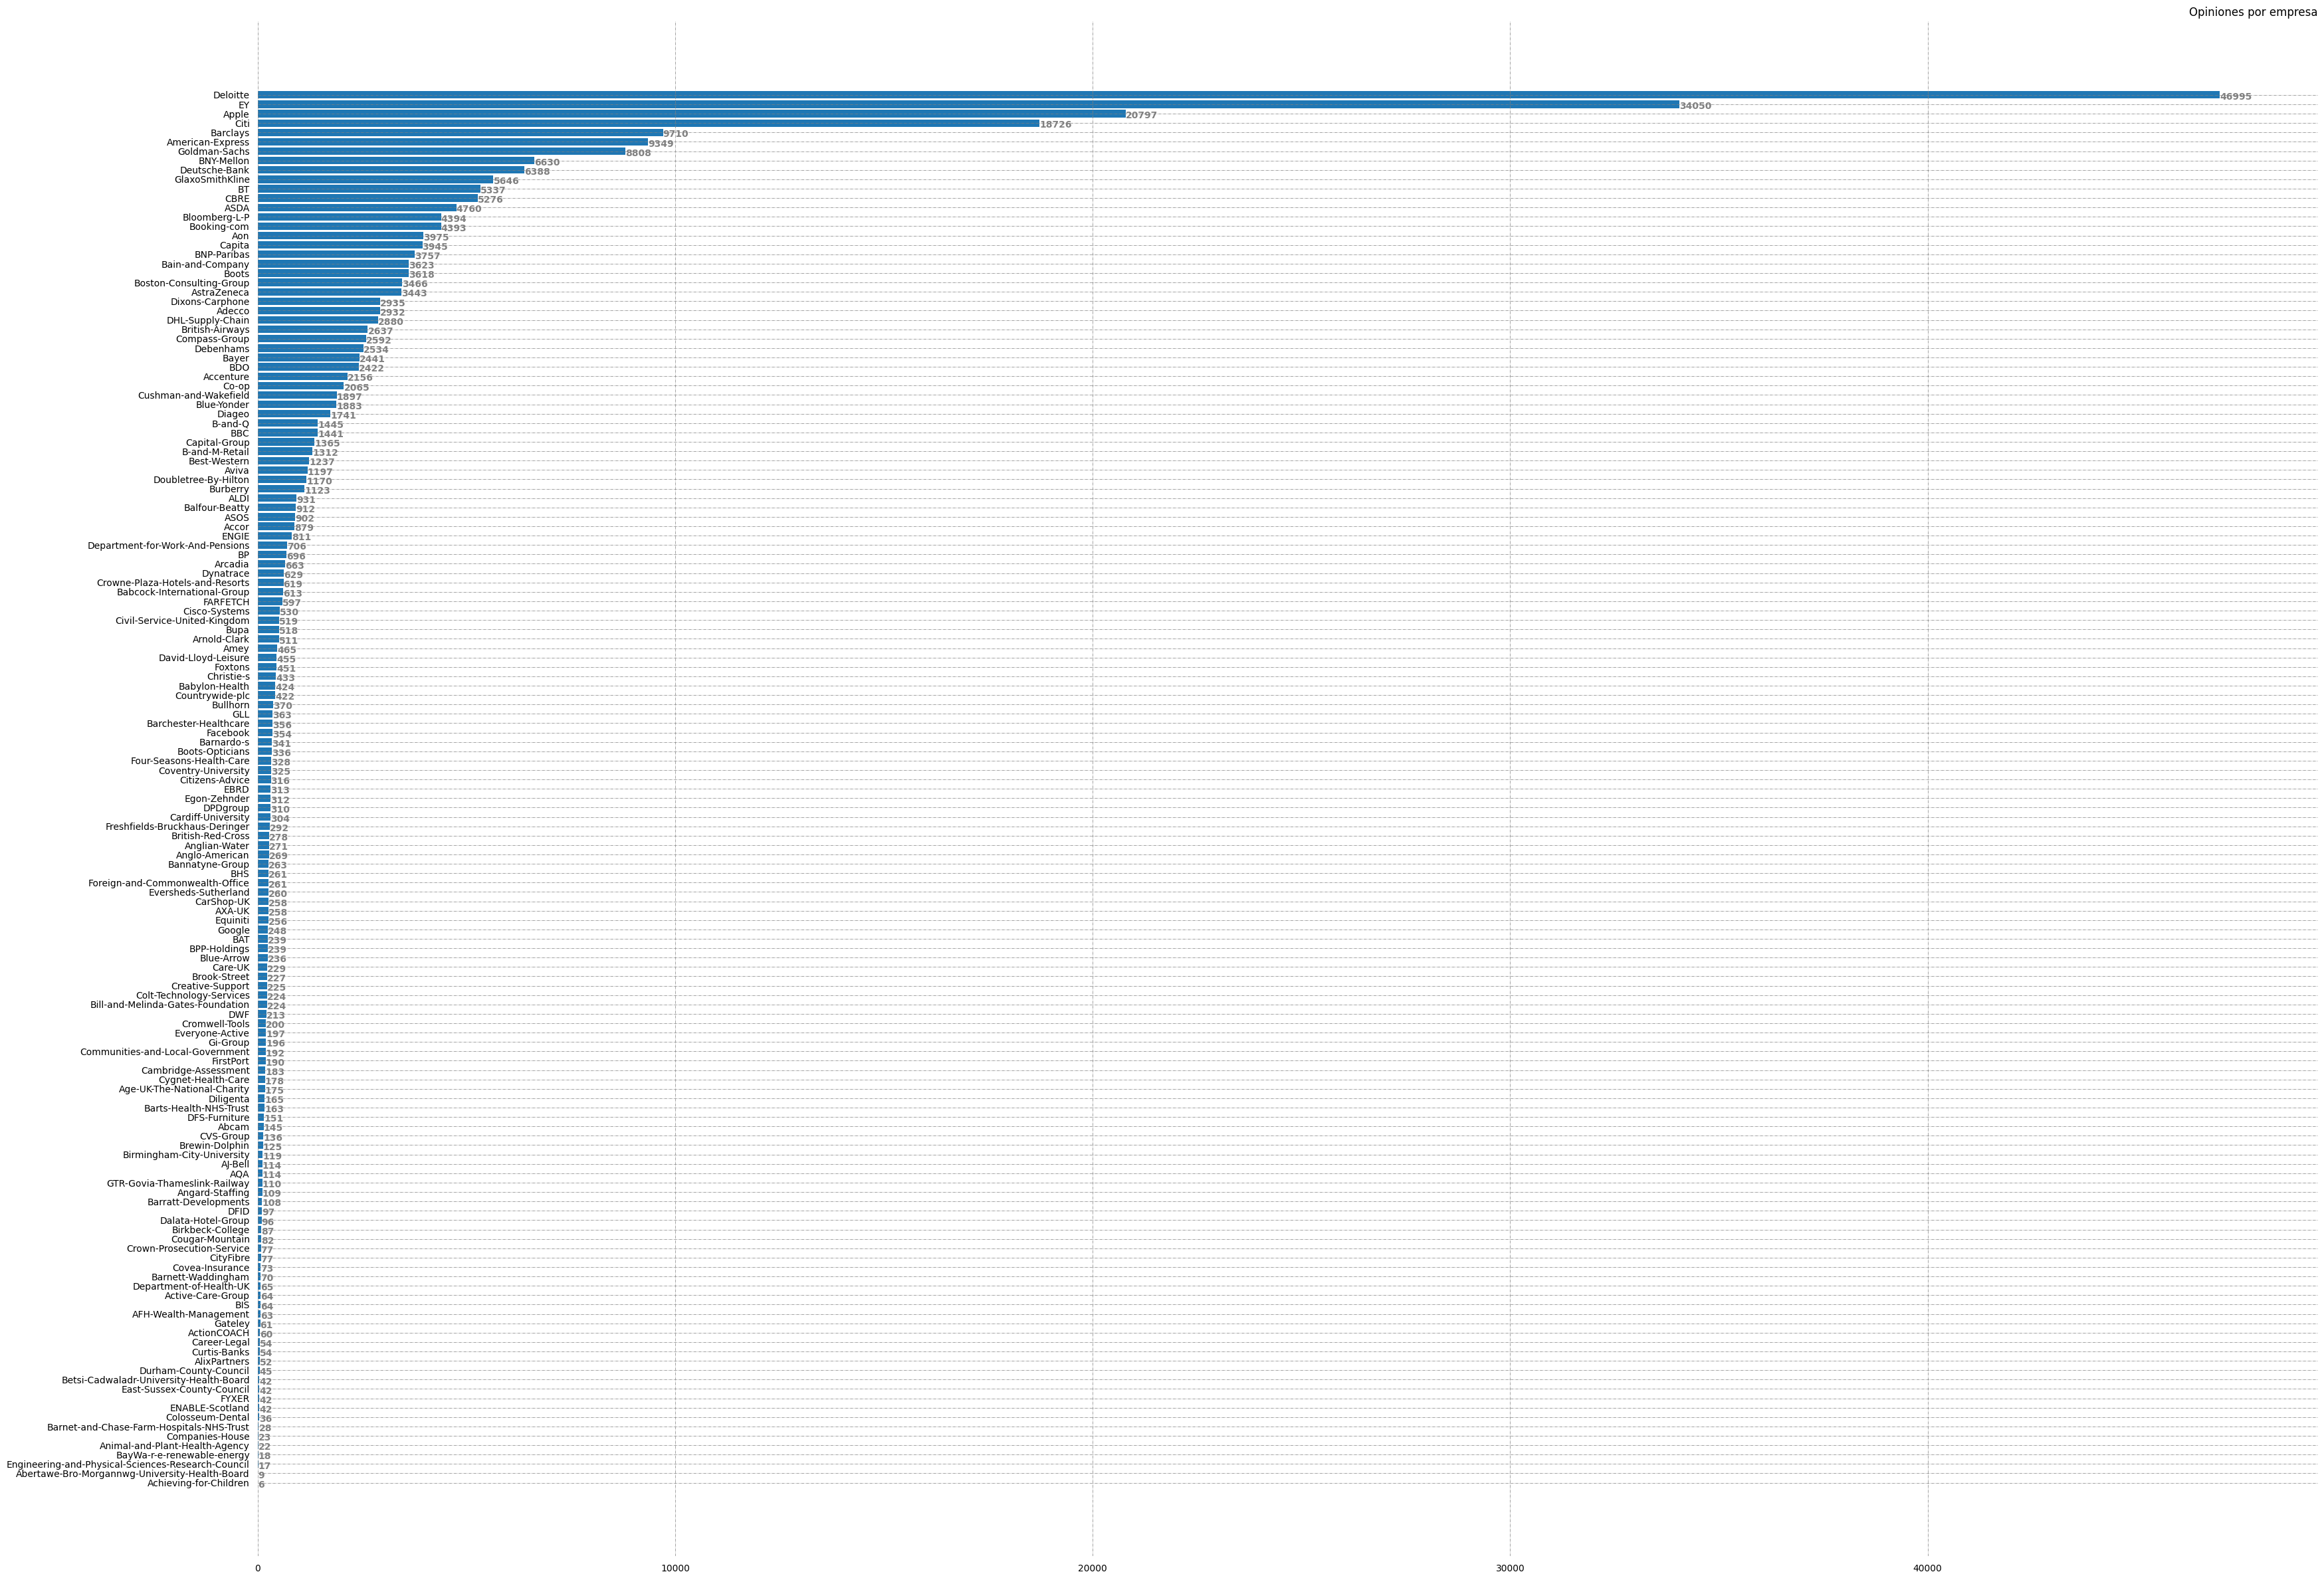

In [8]:
#stats_eightncat= single_pos_plyrs.filter(items=['STL','PF', 'Pos','FG','TRB', 'AST', '3P', 'BLK', 'PTS', 'MP'])
qxfirm = firms['firm'].value_counts()

fig, ax = plt.subplots(figsize =(40,30))




review_quantity = qxfirm.values
firm_names = qxfirm.index

ax.barh(firm_names, review_quantity)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)

# Add x, y gridlines
ax.grid( color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 1)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.6, i.get_y()+0.9,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Opiniones por empresa',
             loc ='right', )



# Show Plot
plt.show()

In [9]:
#Filtramos los resultados por pertenencia a estas compañias

Not_DEACB_firms = df[~df['firm'].isin(['Deloitte','EY','Apple','Citi','Barclays'])]

DEACB_firms = df[df['firm'].isin(['Deloitte','EY','Apple','Citi','Barclays'])]

In [10]:
print((Not_DEACB_firms['firm'].value_counts())/df.shape[0]*100)

American-Express                                      3.264612
Goldman-Sachs                                         3.075698
BNY-Mellon                                            2.315154
Deutsche-Bank                                         2.230649
GlaxoSmithKline                                       1.971548
                                                        ...   
Animal-and-Plant-Health-Agency                        0.007682
BayWa-r-e-renewable-energy                            0.006285
Engineering-and-Physical-Sciences-Research-Council    0.005936
Abertawe-Bro-Morgannwg-University-Health-Board        0.003143
Achieving-for-Children                                0.002095
Name: firm, Length: 144, dtype: float64


In [ ]:
#agregar a df o firms una columna que conterga si pertenecen o no a la distribución normal
# ver como la profesora hizo el grafico en una escala logaritmica para ver si normaliza el dataset

sns.catplot(
    data=Not_DEACB_firms, x="overall_rating",  kind="count",
    palette="pastel", edgecolor=".6",
)

Other information
Ranking for the recommendation of the firm, CEO approval, and outlook are allocated categories v, r, x, and o, with the following meanings:
v - Positive, r - Mild, x - Negative, o - No opinion



In [ ]:
#Ver que porcentaje hay de nulos y como se distribuyen las opiniones
